<a href="https://colab.research.google.com/github/SJY-coder/STSEL/blob/main/stsel_en_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(5000, 100)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
p_inputs (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               77100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               3300      
_________________________________________________________________
dense_5 (Dense)              (None, 256)         

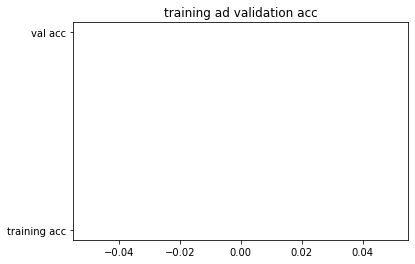

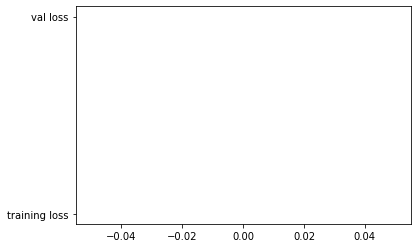

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

##pre-processing data##
p_url ='/content/combined_p_csv.csv'
p_dataset = pd.read_csv(p_url)
p_dataset = p_dataset.T
p_dataset = p_dataset.iloc[:,:100]
transformer = Normalizer().fit(p_dataset)
p_dataset = transformer.transform(p_dataset)
#p_dataset = preprocessing.normalize(p_dataset)
print(p_dataset.shape)  #(5000,100)

#spliting dataset to train/test
from sklearn.model_selection import train_test_split
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(p_dataset, p_dataset, test_size = 0.01, random_state = 0)

#shape feature data
#s_dataset = pd.read_csv('/home/junyoung/PycharmProjects/stsel/encoder_decoder/DesignVariables_Test.csv')
#s_dataset = np.asarray(s_dataset,dtype=float)
#s_dataset = np.expand_dims(s_dataset,axis=2)
#print(s_dataset.shape)  #(5000,110,1)

####HYPER_PARAMETERS####
lr=4.8e-4
PATIENCE=200
EPOCHS=1
BATCH_SIZE=200
VALIDATION_SPLIT=0.02
optimizer = tf.keras.optimizers.Adam(lr)
########################



early_stopping = tf.keras.callbacks.EarlyStopping(patience=PATIENCE)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

p_inputs = Input(shape=(100),name='p_inputs')
#s_inputs = Input(shape=(6,1),name='s_inputs')

#inputs = Concatenate()([p_inputs,s_inputs])

# 100-64-32-16-32-64-100
m1 = Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(p_inputs)
m1 = Dense(256,activation='relu')(m1)
m1 = Dense(300,activation='relu')(m1)
m1 = Dense(10,activation='relu')(m1)
m1 = Dense(300,activation='relu')(m1)
m1 = Dense(256,activation='relu')(m1)
m1 = Dense(128,activation='relu')(m1)

outputs = Dense(100,activation='relu')(m1)

#model1 = Model(inputs=[p_inputs,s_inputs],outputs=outputs)

model1 = Model(inputs=p_inputs,outputs=outputs)
model1.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
model1.summary()

#history1 = model1.fit({'p_inputs':X_p_train,'s_inputs':X_s_train},X_p_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT,
#                    callbacks=[early_stopping,lr_schedule])

history1 = model1.fit(X_p_train,X_p_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT,
                   callbacks=[early_stopping])


acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'r',"training acc")
plt.plot(epochs,val_acc,'b',"val acc")
plt.title('training ad validation acc')
plt.figure()

plt.plot(epochs,loss,'r',"training loss")
plt.plot(epochs,val_loss,'b',"val loss")

In [ ]:
pr = tf.expand_dims(X_p_train[1,:],0)
pr = model1.predict(pr)

In [ ]:
pr

array([[0.15695588, 0.1563759 , 0.15539427, 0.1561735 , 0.15556137,
        0.1549304 , 0.15392704, 0.15423283, 0.15445602, 0.15393789,
        0.15391017, 0.15495959, 0.15632047, 0.15778613, 0.15866625,
        0.15871903, 0.15986726, 0.16377018, 0.16923523, 0.17295538,
        0.17157668, 0.16171041, 0.14653319, 0.12568803, 0.10489486,
        0.08744916, 0.07645816, 0.        , 0.06391603, 0.06421442,
        0.06259954, 0.06164276, 0.06208222, 0.05949016, 0.05903883,
        0.05705683, 0.05687461, 0.05731863, 0.05641312, 0.05531602,
        0.05468793, 0.0529065 , 0.0512135 , 0.04985876, 0.04957049,
        0.04952078, 0.04764811, 0.04763952, 0.04705981, 0.04731263,
        0.04766668, 0.04767762, 0.04729553, 0.04660171, 0.04475731,
        0.04407889, 0.04391572, 0.0438297 , 0.04243883, 0.04305528,
        0.04282195, 0.04219436, 0.04223672, 0.04300856, 0.04265977,
        0.04350188, 0.04274943, 0.04653911, 0.0489241 , 0.05293863,
        0.06053409, 0.06587003, 0.07120659, 0.07

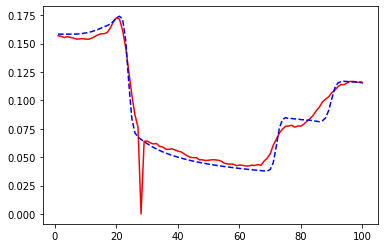

In [ ]:
import matplotlib.pyplot as plt
x_axis = list(range(1,101))
pr = np.reshape(pr,(100,))
plt.plot(x_axis,pr,'r-')
plt.plot(x_axis,X_p_train[1,:],'b--')

In [ ]:
pr_list = []

for i in range(10):
  pr = tf.expand_dims(X_p_test[i,:],0)
  pr = model1.predict(pr)
  pr_list.append(pr)

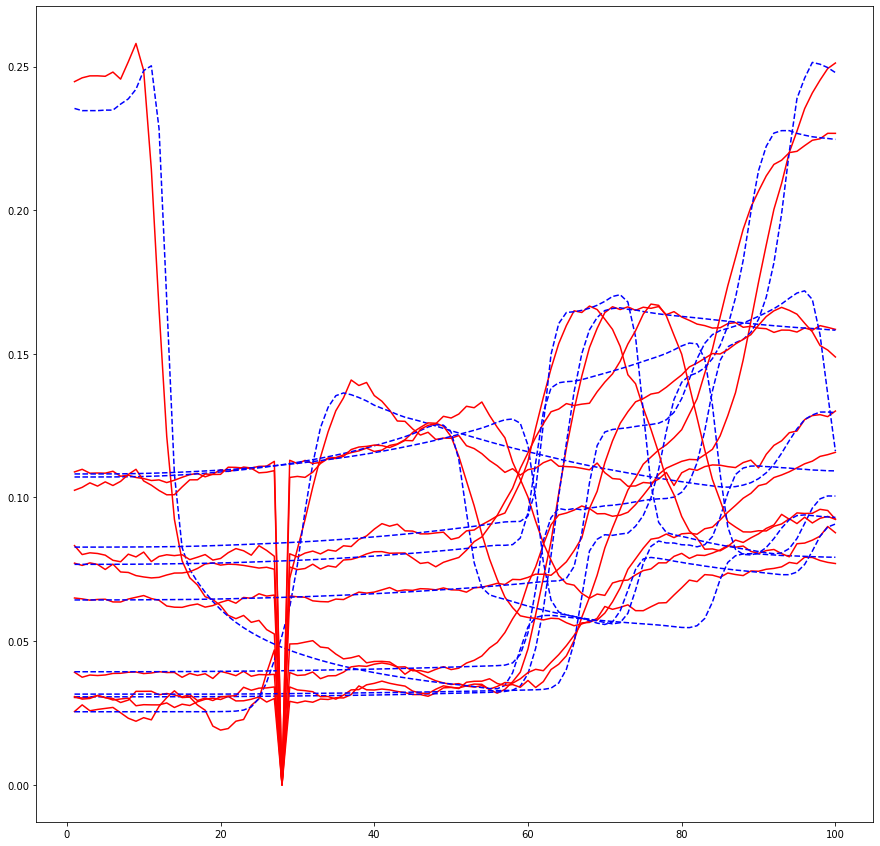

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.plot(x_axis,np.reshape(pr_list[i],(100,)),'r-')
  plt.plot(x_axis,X_p_test[i,:],'b--')

In [ ]:
model1.save('model1.h5')

In [ ]:
p_inputs_tmp = Input(shape=(100),name='p_inputs_tmp')
m1_tmp = Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(p_inputs_tmp)
m1_tmp = Dense(256,activation='relu')(m1_tmp)
m1_tmp = Dense(300,activation='relu')(m1_tmp)
outputs_tmp = Dense(10,activation='relu',name='16_feature')(m1_tmp)
encoder = Model(inputs=p_inputs_tmp,outputs=outputs_tmp)
encoder.layers[0].set_weights(model1.layers[0].get_weights())
encoder.layers[1].set_weights(model1.layers[1].get_weights())
encoder.layers[2].set_weights(model1.layers[2].get_weights())
encoder.layers[3].set_weights(model1.layers[3].get_weights())
encoder.layers[4].set_weights(model1.layers[4].get_weights())
encoder.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
encoded_output = encoder.predict(p_dataset)

In [ ]:
encoded_output.shape

(5000, 10)

In [ ]:
p_inputs_tmp2 = Input(shape=(10),name='p_inputs_tmp2')
m1_tmp2 = Dense(300,activation='relu')(p_inputs_tmp2)
m1_tmp2 = Dense(256,activation='relu')(m1_tmp2)
m1_tmp2 = Dense(128,activation='relu')(m1_tmp2)
outputs_tmp2 = Dense(100,activation='relu')(m1_tmp2)
decoder = Model(inputs=p_inputs_tmp2,outputs=outputs_tmp2)
decoder.layers[1].set_weights(model1.layers[5].get_weights())
decoder.layers[2].set_weights(model1.layers[6].get_weights())
decoder.layers[3].set_weights(model1.layers[7].get_weights())
decoder.layers[4].set_weights(model1.layers[8].get_weights())
decoder.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
decoder.summary()
decoded_output = decoder.predict(encoded_output)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
p_inputs_tmp2 (InputLayer)   [(None, 10)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               3300      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               12900     
Total params: 126,152
Trainable params: 126,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(decoded_output)
print(model1.predict(p_dataset))
print('matches perfectly! encoder and decoder worked!')

[[0.10789326 0.10814595 0.10769791 ... 0.10539668 0.10625596 0.10748737]
 [0.07640912 0.07464154 0.07489219 ... 0.10870636 0.10986005 0.1088815 ]
 [0.11109506 0.110212   0.11045524 ... 0.13016775 0.13044067 0.12958288]
 ...
 [0.04654575 0.04632638 0.04636602 ... 0.17642725 0.18018131 0.1816784 ]
 [0.05805175 0.05673135 0.05707192 ... 0.18756577 0.19285059 0.1970448 ]
 [0.11020621 0.1112233  0.11004821 ... 0.12838511 0.12803267 0.12896237]]
[[0.10789326 0.10814595 0.10769791 ... 0.10539668 0.10625596 0.10748737]
 [0.07640912 0.07464154 0.07489219 ... 0.10870636 0.10986005 0.1088815 ]
 [0.11109506 0.110212   0.11045524 ... 0.13016775 0.13044067 0.12958288]
 ...
 [0.04654575 0.04632638 0.04636602 ... 0.17642725 0.18018131 0.1816784 ]
 [0.05805175 0.05673135 0.05707192 ... 0.18756577 0.19285059 0.1970448 ]
 [0.11020621 0.1112233  0.11004821 ... 0.12838511 0.12803267 0.12896237]]
matches perfectly! encoder and decoder worked!


In [3]:
#design variable -> 16 feature model

#attempt no.1 (simple neural network)
from sklearn import preprocessing
s_url ='/content/DesignVariables_Test.csv'
s_dataset = pd.read_csv(s_url)
#transformer = Normalizer().fit(s_dataset)
#s_dataset = transformer.transform(s_dataset)
#s_dataset = preprocessing.normalize(s_dataset)
print(s_dataset.shape)  #(5000,6)

y_s_dataset = encoder.predict(p_dataset)
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(s_dataset, y_s_dataset, test_size = 0.01, random_state = 0)

# 6 feature -> 16 feature
s_inputs = Input(shape=(6),name='s_inputs')
# 6-8-16-32-16
m2 = Dense(16,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(s_inputs)
m2 = Dense(32,activation='relu')(m2)
m2 = Dense(64,activation='relu')(m2)
m2 = Dense(128,activation='relu')(m2)
m2 = Dense(256,activation='relu')(m2)
m2 = Dense(512,activation='relu')(m2)
s_outputs = Dense(10,activation='relu')(m2)

optimizer = tf.keras.optimizers.Adam(5e-9)

model2 = Model(inputs=s_inputs,outputs=s_outputs)
model2.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
model2.summary()

PATIENCE = 200

history2 = model2.fit(X_s_train,y_s_train,epochs=1,batch_size=100,validation_split=VALIDATION_SPLIT,
                   callbacks=[early_stopping])


acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'r',"training acc")
plt.plot(epochs,val_acc,'b',"val acc")
plt.title('training ad validation acc')
plt.figure()

plt.plot(epochs,loss,'r',"training loss")
plt.plot(epochs,val_loss,'b',"val loss")

(4999, 6)


NameError: ignored

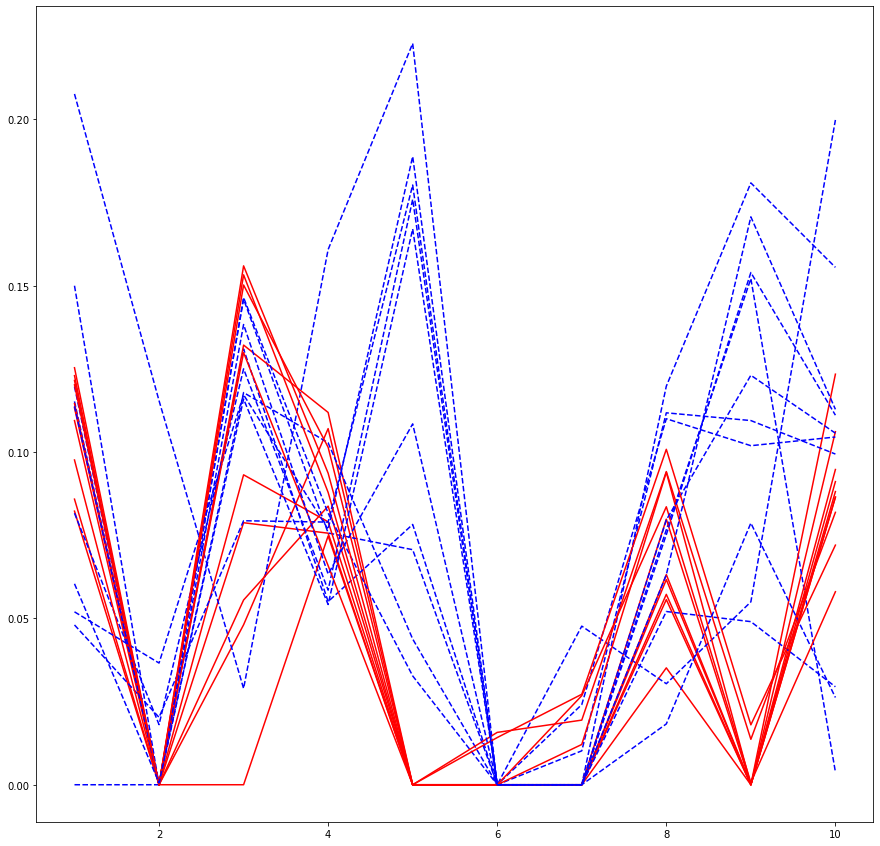

In [ ]:
pr_list_s = []
x_axis = list(range(1,11))
for i in range(10):
  pr_s = tf.expand_dims(X_s_test.iloc[i,:],0)
  pr_s = model2.predict(pr_s)
  pr_list_s.append(pr_s)
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.plot(x_axis,np.reshape(pr_list_s[i],(10,)),'r-')
  plt.plot(x_axis,y_s_test[i,:],'b--')

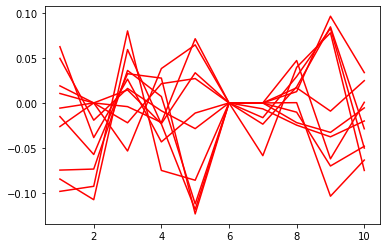

In [ ]:
for i in range(10):
  plt.plot(x_axis,np.reshape(model2.predict(X_s_train)[i]-y_s_train[i],(10,)),'r-')

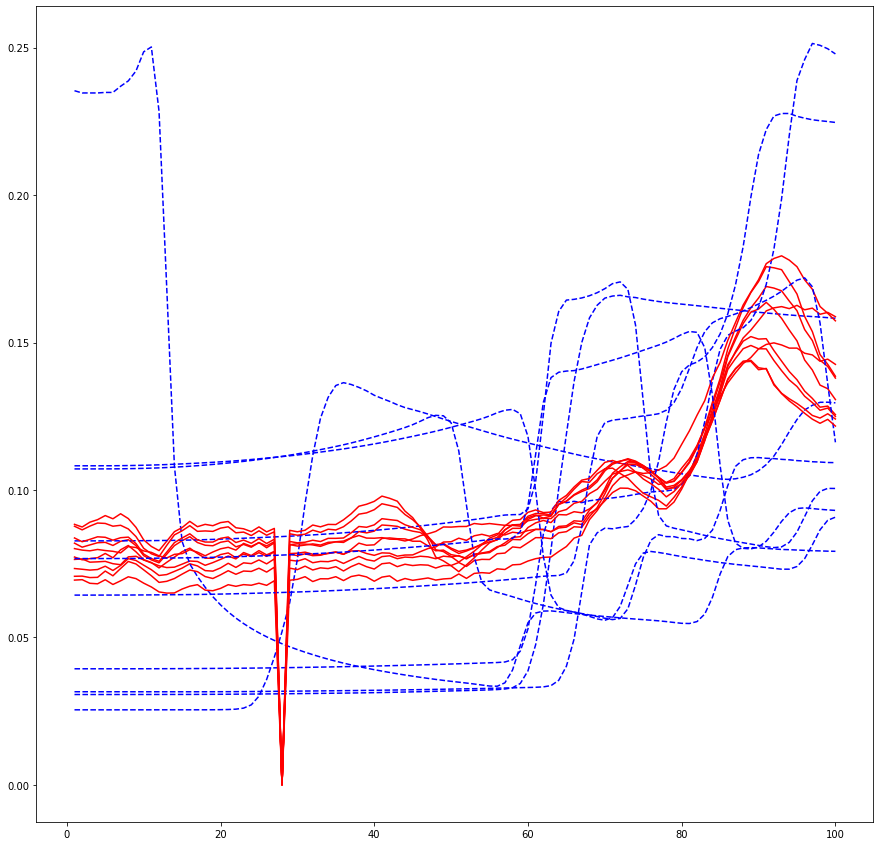

In [ ]:
#all together
# train model1 -> devide to encoder & decoder -> use result from encoder as ouput to train 6 shape to 16feature 
#step1 : model2 -> input:X_s_test output: 16feature
#step2: decoder -> input:output from step1 output: y_p_test


X_s_train, X_s_test, y_p_train, y_p_test = train_test_split(s_dataset, p_dataset, test_size = 0.1, random_state = 0)

step1_input = X_s_test
step1_output = model2.predict(step1_input)
step2_input = step1_output
step2_output = decoder.predict(step2_input)

pr_list_all = []
x_axis = list(range(1,101))
for i in range(10):
  pr_all = tf.expand_dims(X_s_test.iloc[i,:],0)
  pr_all = model2.predict(pr_all)
  pr_all = decoder.predict(pr_all)
  pr_list_all.append(pr_all)
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.plot(x_axis,np.reshape(pr_list_all[i],(100,)),'r-')
  plt.plot(x_axis,y_p_test[i,:],'b--')

In [109]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import statistics

##pre-processing data##
p_url ='/content/combined_p_csv.csv'
p_dataset = pd.read_csv(p_url)
p_dataset = p_dataset.T
p_dataset = p_dataset.iloc[:,:100]
p_mean = np.mean(p_dataset)
p_stdev = np.std(p_dataset)
p_dataset = (p_dataset-p_mean)/p_stdev
p_dataset = np.asarray(p_dataset)
print(p_dataset.shape)  #(5000,100)

s_url ='/content/DesignVariables_Test.csv'
s_dataset = pd.read_csv(s_url)
print(s_dataset.shape)  #(5000,6)


#spliting dataset to train/test

X_s_train, X_s_test, y_p_train, y_p_test = train_test_split(s_dataset, p_dataset, test_size = 0.01, random_state = 0)

(5000, 100)
(5000, 6)


In [108]:
p_dataset[0,:]

array([-0.03379914, -0.02533705, -0.02533705, -0.02533705, -0.0103186 ,
       -0.0103186 ,  0.00263889,  0.01204353,  0.03076841,  0.04117655,
        0.06117999,  0.0696526 ,  0.09089626,  0.09773765,  0.11936933,
        0.12646884,  0.14972681,  0.1576572 ,  0.18162265,  0.20611945,
        0.23172665,  0.25788905,  0.28326305,  0.30831513,  0.33305003,
        0.35695962,  0.37994497,  0.40144787,  0.42161471,  0.44052694,
        0.45715897,  0.47138889,  0.48340792,  0.49249577,  0.50065746,
        0.5086977 ,  0.51484469,  0.51893043,  0.52172095,  0.52378692,
        0.52465962,  0.52365363,  0.5201532 ,  0.51413099,  0.50571682,
        0.49634226,  0.4872574 ,  0.48032095,  0.47660774,  0.47421333,
        0.46654775,  0.45050489,  0.4161927 ,  0.3139999 ,  0.082491  ,
       -0.20550692, -0.39013053, -0.45886441, -0.48506349, -0.50603411,
       -0.52775806, -0.55047636, -0.57417473, -0.59897573, -0.62286887,
       -0.63719838, -0.62532327, -0.57822859, -0.51812391, -0.49

In [101]:
from keras import backend as K 
import math
K.clear_session()

shape_inputs = Input(shape=(6),name='shape_inputs')

m3 = Dense(50,activation='relu')(shape_inputs)

for i in range(4):
  m3 = Dense(50,activation='relu')(m3)

outputs = Dense(100,activation='relu')(m3)

model3 = Model(inputs=shape_inputs,outputs=outputs)


##
EPOCHS = 5000
BATCH_SIZE = 10000
PATIENCE=100
initial_learning_rate = 0.001

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 500.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)


early_stopping = tf.keras.callbacks.EarlyStopping(patience=PATIENCE)
optimizer = tf.keras.optimizers.Adam(lr)

model3.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
shape_inputs (InputLayer)    [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                350       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100  

In [102]:
history3 = model3.fit(X_s_train,y_p_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT,callbacks=[lr_schedule],verbose=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 3751/5000

Epoch 03751: LearningRateScheduler reducing learning rate to 7.8125e-06.
1/1 [==============================] - 0s 45ms/step - loss: 1.0093 - accuracy: 0.0862 - val_loss: 0.6041 - val_accuracy: 0.0808
Epoch 3752/5000

Epoch 03752: LearningRateScheduler reducing learning rate to 7.8125e-06.
1/1 [==============================] - 0s 45ms/step - loss: 1.0093 - accuracy: 0.0862 - val_loss: 0.6041 - val_accuracy: 0.0808
Epoch 3753/5000

Epoch 03753: LearningRateScheduler reducing learning rate to 7.8125e-06.
1/1 [==============================] - 0s 45ms/step - loss: 1.0093 - accuracy: 0.0862 - val_loss: 0.6041 - val_accuracy: 0.0808
Epoch 3754/5000

Epoch 03754: LearningRateScheduler reducing learning rate to 7.8125e-06.
1/1 [==============================] - 0s 52ms/step - loss: 1.0093 - accuracy: 0.0862 - val_loss: 0.6041 - val_accuracy: 0.0808
Epoch 3755/5000

Epoch 03755: LearningRateScheduler reducing learning rate to 7.8125e-06.
1/

(0.0001, 0.01, 0.5, 1.5)

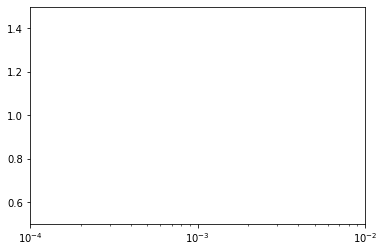

In [95]:
plt.semilogx(history3.history["lr"], history3.history["loss"])
plt.axis([1e-4, 1e-2, 0.5, 1.5])

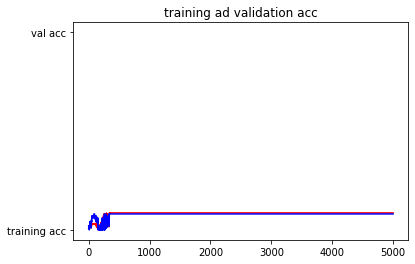

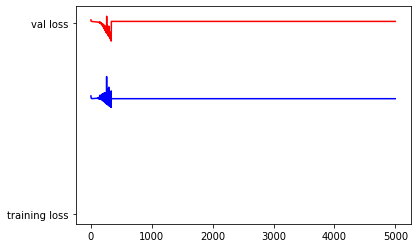

In [110]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'r',"training acc")
plt.plot(epochs,val_acc,'b',"val acc")
plt.title('training ad validation acc')
plt.figure()

plt.plot(epochs,loss,'r',"training loss")
plt.plot(epochs,val_loss,'b',"val loss")

In [112]:
print(model3.predict(tf.expand_dims(X_s_train.iloc[0,:],0)))
print(y_p_train[0,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
[-0.02970755 -0.02104225 -0.02104225 -0.02104225 -0.00578057 -0.00578057
  0.00742169  0.0166789   0.03563287  0.0458714   0.06601349  0.07420769
  0.09545712  0.10185923  0.12327313  0.12975649  0.15250871  0.15959695
  0.18264135  0.20590118  0.22990317  0.2540577   0.27702583  0.29930643
  0.3209544   0.34150765  0.36087863  0.37851579  0.3945639   0.40916095
  0.4213702   0.43108923  0.43846509  0.44273654  0.44571759  0.44832381
  0.44911384  0.44791071  0.44538271  0.44208645  0.43764175  0.43138353
  0.42262237  0.41131171  0.39778864  0.38349972  0.36948881  0.35695669
  0.34543515  0.33337743  0.31965776  0.30484662  0.28956214  0.27506824
  0.27676801  0.33773304  0.524

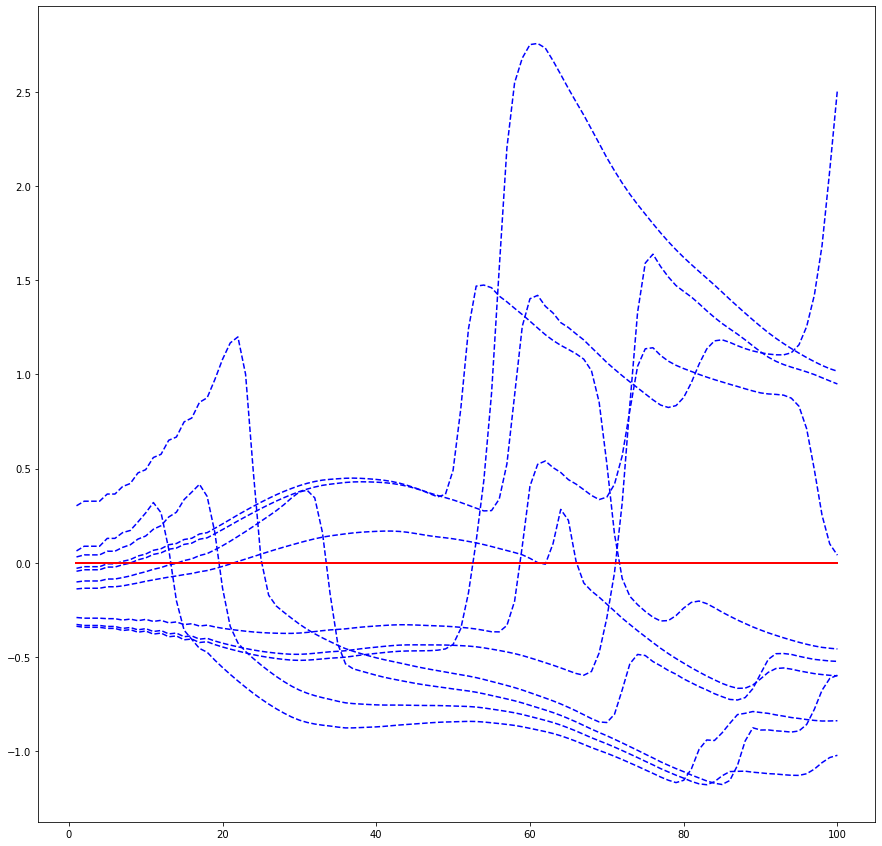

In [113]:
pr_list_all = []
x_axis = list(range(1,101))
for i in range(10):
  pr_all = tf.expand_dims(X_s_train.iloc[i,:],0)
  pr_all = model3.predict(pr_all)
  pr_list_all.append(pr_all)
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.plot(x_axis,np.reshape(pr_list_all[i],(100,)),'r-')
  plt.plot(x_axis,y_p_train[i,:],'b--')